In [2]:
import numpy as np
import matplotlib.pyplot as plt

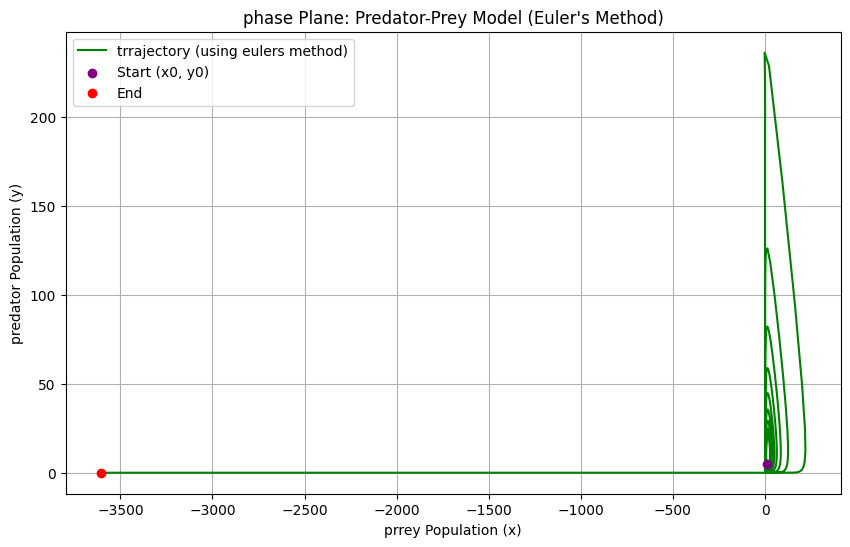

In [6]:
# here i just create a function which easily descriebs the processs 
def predator_prey(t, z, alpha, beta, gamma, delta):
    x, y = z
    dxdt = x * (alpha - beta * y)
    dydt = -y * (gamma - delta * x)
    return [dxdt, dydt]

def euler_method(pred_prey_func, t_span, z0, k, params):
    n_steps = int((t_span[1] - t_span[0]) / k)
    t_values = np.linspace(t_span[0], t_span[1], n_steps + 1)
    z_values = np.zeros((2, n_steps + 1))
    z_values[:, 0] = z0

    for i in range(n_steps):
        t = t_values[i]
        z = z_values[:, i]
        dzdt = pred_prey_func(t, z, *params)
        z_values[:, i + 1] = z + k * np.array(dzdt)
        # the euler method is A-conditionally stable but still, ill choose the correct step size k so that it will work :0
    
    return t_values, z_values

alpha = 1.0
beta = 0.1
gamma = 1.5
delta = 0.1

# lets say that initial values for x and y are 10 and 5 or smth like that
x0 = 10 
y0 = 5  
z0 = [x0, y0]
k = 0.05  
t_span = (0, 100) 
params = (alpha, beta, gamma, delta) 


t_euler, z_euler = euler_method(predator_prey, t_span, z0, k, params)
x_euler, y_euler = z_euler

plt.figure(figsize=(10, 6))
plt.plot(x_euler, y_euler, label="trrajectory (using eulers method)", color="green")
plt.scatter(x_euler[0], y_euler[0], color="purple", label="Start (x0, y0)", zorder=5)
plt.scatter(x_euler[-1], y_euler[-1], color="red", label="End", zorder=5)
plt.xlabel("prrey Population (x)")
plt.ylabel("predator Population (y)")
plt.title("phase Plane: Predator-Prey Model (Euler's Method)")
plt.legend()
plt.grid()
plt.show()


## soo the populations do not approach a constant value as time progresses but instead oscillate perpetually around the coexistence equilibrium point 
### (15,10) The system lacks asymptotic stability due to the nature of the equations